# <font color='gold'> ***Análise Exploratória de Dados: IBGE*** </font>
---

<h1>
    <p align="center">
        Work in Progress 🛠️
    </p>
</h1>

Objetivos:

- Realizar uma análise focada nas variáveis referentes a população brasileira e alguns índices econômicos;

Algumas possibilidades: 

- Comparativos entre estados ou regiões do Brasil no quesito populacional e/ou econômico;

- Procurar entender quais os estados com os municípios mais ricos, mais populosos, com mais imigrantes;

- Rankeamento desses estados com base em alguns KPI's (GDP, IDH, População total);

- Um dado interessante para a análise também pode ser a distribuição de carros/motos por cidadão.

- Divisão etária da população desses estados, buscando quais os de população mais jovem e velha na média;

## <font color='gold'>***Coleta de Dados e Seleção de Variáveis Necessárias***</font>
---

In [51]:
# Importando pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings

# Definindo parâmetros de estilização do Seaborn:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

# Definindo método de apresentação de dados com o método describe():
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Filtrando avisos:
warnings.filterwarnings("ignore")

print('Pacotes prontos!')

Pacotes prontos!


In [2]:
# Criando dataframe:
data = pd.read_csv('data/BRAZIL_CITIES.csv', sep=';')

In [3]:
# Visualizando dados:
data.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.000,6876.000,0.000,2137.000,1546.000,591.000,5300.000,...,NaN,NaN,NaN,2158.000,1246.000,0.000,NaN,NaN,NaN,1.000
1,Abadia Dos Dourados,MG,0,6704.000,6704.000,0.000,2328.000,1481.000,847.000,4154.000,...,NaN,NaN,NaN,2227.000,1142.000,0.000,NaN,NaN,NaN,1.000
2,Abadiânia,GO,0,15757.000,15609.000,148.000,4655.000,3233.000,1422.000,10656.000,...,1.000,33724584.000,67091904.000,2838.000,1426.000,0.000,NaN,NaN,NaN,3.000
3,Abaeté,MG,0,22690.000,22690.000,0.000,7694.000,6667.000,1027.000,18464.000,...,2.000,44974716.000,371922572.000,6928.000,2953.000,0.000,NaN,NaN,NaN,4.000
4,Abaetetuba,PA,0,141100.000,141040.000,60.000,31061.000,19057.000,12004.000,82956.000,...,4.000,76181384.000,800078483.000,5277.000,25661.000,0.000,NaN,NaN,NaN,2.000


In [4]:
# Checando shape:
data.shape

(5573, 81)

Dados: 5573 Registros em 81 Variáveis

In [5]:
# Checando colunas:
data.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       ' GVA_TOTAL ', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'P

Antes de nos aprofundarmos mais no Dataset, iremos realizar um corte de variáveis, preservando apenas aquelas que interessam para a análise proposta no início.

In [6]:
# Selecionando as variáveis que serão relevantes para a análise:
data_pop = data.loc[
    :,
    ['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS', 'IBGE_RES_POP_ESTR', 'IBGE_DU', 
    'IBGE_DU_URBAN', 'IBGE_DU_RURAL', 'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
    'IBGE_15-59', 'IBGE_60+', 'Cars', 'Motorcycles', 'IDHM', 'IDHM_Renda', 
    'IDHM_Longevidade', 'IDHM_Educacao', 'TAXES', 'LAT', 'LONG']
].copy()


In [7]:
# Visualizando novos dados:
data_pop.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,IBGE_60+,Cars,Motorcycles,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,TAXES,LAT,LONG
0,Abadia De Goiás,GO,0,6876.000,6876.000,0.000,2137.000,1546.000,591.000,5300.000,...,416.000,2158.000,1246.000,0.708,0.687,0.830,0.622,20554.200,-16.759,-49.441
1,Abadia Dos Dourados,MG,0,6704.000,6704.000,0.000,2328.000,1481.000,847.000,4154.000,...,589.000,2227.000,1142.000,0.690,0.693,0.839,0.563,12873.500,-18.488,-47.397
2,Abadiânia,GO,0,15757.000,15609.000,148.000,4655.000,3233.000,1422.000,10656.000,...,990.000,2838.000,1426.000,0.690,0.671,0.841,0.579,26822.580,-16.183,-48.719
3,Abaeté,MG,0,22690.000,22690.000,0.000,7694.000,6667.000,1027.000,18464.000,...,2681.000,6928.000,2953.000,0.698,0.720,0.848,0.556,26994.090,-19.156,-45.446
4,Abaetetuba,PA,0,141100.000,141040.000,60.000,31061.000,19057.000,12004.000,82956.000,...,5996.000,5277.000,25661.000,0.628,0.579,0.798,0.537,95180.480,-1.723,-48.884


Com nossas variáveis selecionadas, podemos dar início propriamente as análises iniciais do Dataset e limpeza.

## <font color='gold'>***Análise Inicial e Conhecendo os Dados***</font>
---

In [8]:
# Visualizando o novo shape:
data_pop.shape

(5573, 25)

In [9]:
data_pop.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'Cars', 'Motorcycles', 'IDHM', 'IDHM_Renda',
       'IDHM_Longevidade', 'IDHM_Educacao', 'TAXES', 'LAT', 'LONG'],
      dtype='object')

Agora temos os mesmos 5573 registros em apenas 23 variáveis

Para termos uma visão melhor e mais apropiada do conteúdo de cada variável, realizaremos um dicionário de variáveis, baseado no arquivo CSV presente na pasta `data` chamado `Data_Dictionary.csv`:


| <p align='center'>**Variável**</p>| <p align='center'>**Conteúdo**</p>                                                         |
|-----------------------------------|--------------------------------------------------------------------------------------------|
| *`CITY`*                          | Nome da cidade.                                                                            |
| *`STATE`*                         | Nome do estado.                                                                            |
| *`CAPITAL`*                       | Indica se a cidade nomeada no registro é a capital do estado.                              |
| *`IBGE_RES_POP`*                  | Número de habitantes da cidade de acordo com o senso de 2010.                              |
| *`IBGE_RES_POP_BRAS`*             | Quantos cidadãos da população total da cidade são brasileiros.                             |
| *`IBGE_RES_POP_ESTR`*             | Quantos cidadãos da população total da cidade são estrangeiros.                            |  
| *`IBGE_DU`*                       | Número de unidades domésticas totais.                                                      |
| *`IBGE_DU_URBAN`*                 | Das unidades domésticas totais, quantas estão em regiões urbanas.                          |
| *`IBGE_DU_RURAL`*                 | Das unidades domésticas totais, quantas estão em regiões rurais.                           |
| *`IBGE_POP`*                      | Moradores em domicílios particulares permanentes, em áreas com ordenamento urbano regular. |
| *`IBGE_1`*                        | Número de pessoas com até 1 ano de idade na população referente a tabela `IBGE_POP`.       |
| *`IBGE_1-4`*                      | Número de pessoas entre 1 e 4 anos de idade na população referente a tabela `IBGE_POP`.    |
| *`IBGE_5-9`*                      | Número de pessoas entre 5 e 9 anos de idade na população referente a tabela `IBGE_POP`.    |
| *`IBGE_10-14`*                    | Número de pessoas entre 10 e 14 anos de idade na população referente a tabela `IBGE_POP`.  |
| *`IBGE_15-59`*                    | Número de pessoas entre 15 e 59 anos de idade na população referente a tabela `IBGE_POP`.  |
| *`IBGE_60+`*                      | Número de pessoas a partir dos 60 anos de idade na população referente a tabela `IBGE_POP`.|
| *`Cars`*                          | Número total de carros referente ao ano de 2019.                                           |
| *`Motorcycles`*                   | Número total de Motocicletas referente ao ano de 2019.                                     |
| *`IDHM`*                          | Índice de Desenvolvimento Humano.                                                          |
| *`IDHM_Renda`*                    | Índice de Desenvolvimento Humano - Renda.                                                  |
| *`IDHM_Longevidade`*              | Índice de Desenvolvimento Humano - Longevidade.                                            |
| *`IDHM_Educacao`*                 | Índice de Desenvolvimento Humano - Educação                                                |
| *`TAXES`*                         | Montante total pago em Impostos.                                                           |
| *`LONG`*                          | Coordenada longitudinal da cidade.                                                         |
| *`LAT`*                           | Coordenada latitudinal da cidade.                                                          |

Os nomes das variáveis serão alterados mais adiante, para facilitar a compreensão das mesmas sem a necessidade de referenciar a tabela a todo momento. Este processo também sera realizado para padronizar a nomenclatura da melhor maneira possível.

In [10]:
# Checando informações específicas sobre as variáveis:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5573 non-null   object 
 1   STATE              5573 non-null   object 
 2   CAPITAL            5573 non-null   int64  
 3   IBGE_RES_POP       5565 non-null   float64
 4   IBGE_RES_POP_BRAS  5565 non-null   float64
 5   IBGE_RES_POP_ESTR  5565 non-null   float64
 6   IBGE_DU            5563 non-null   float64
 7   IBGE_DU_URBAN      5563 non-null   float64
 8   IBGE_DU_RURAL      5492 non-null   float64
 9   IBGE_POP           5565 non-null   float64
 10  IBGE_1             5565 non-null   float64
 11  IBGE_1-4           5565 non-null   float64
 12  IBGE_5-9           5565 non-null   float64
 13  IBGE_10-14         5565 non-null   float64
 14  IBGE_15-59         5565 non-null   float64
 15  IBGE_60+           5565 non-null   float64
 16  Cars               5562 

Algumas informações relevantes:

- No total, temos 22 variáveis do tipo float64, 1 do tipo int64 e 2 do tipo object. Visando a melhor performance possível do Dataset, iremos avaliar a possibilidade de alterar os Data Types para opções melhores (int8 ou 32 por exemplo, categorical para as variáveis object, etc.);

- Temos poucos dados faltantes espalhados em diversas colunas.

Dado o fato de que praticamente todas as colunas estão em float por mais que muitas não precisem estar, a avaliação estatística utilizando o método .describe() fica prejudicada, assim como a procura por outliers utilizando boxplots. Sendo assim, antes de continuar essas análises estatísticas, iremos realizar a retirada de valores nulos e as transformações de Data Types nos dados.

## <font color='gold'>***Retirada de Nulls, Alterando Dtypes e Renomenado Colunas***</font>
---

In [11]:
# Criando cópia dos dados para a limpeza:
data_clean = data_pop.copy()

### Renomenado Colunas:

In [12]:
# Renomeando e padronizando colunas:
data_clean = data_clean.rename(columns={
    'CITY': 'City', 'STATE': 'State', 'CAPITAL': 'Capital',
    'IBGE_RES_POP': 'Total_Pop', 'IBGE_RES_POP_BRAS': 'Total_Pop_Brazilians',
    'IBGE_RES_POP_ESTR': 'Total_Pop_Foreigners', 'IBGE_DU': 'Total_Uni_Dom',
    'IBGE_DU_URBAN': 'Total_Uni_Dom_Urb', 'IBGE_DU_RURAL': 'Total_Uni_Dom_Rur',
    'IBGE_POP': 'Total_Pop_Urb', 'IBGE_1': 'Pop_Urb_1', 'IBGE_1-4': 'Pop_Urb_1-4',
    'IBGE_5-9': 'Pop_Urb_5-9', 'IBGE_10-14': 'Pop_Urb_10-14', 'IBGE_15-59': 'Pop_Urb_15-19',
    'IBGE_60+': 'Pop_Urb_60+', 'Cars': 'Total_Cars', 'Motorcycles': 'Total_Motorcycles',
    'TAXES': 'Taxes', 'LAT': 'City_Latitude', 'LONG': 'City_Longitude'
})

In [13]:
data_clean.head()

,City,State,Capital,Total_Pop,Total_Pop_Brazilians,Total_Pop_Foreigners,Total_Uni_Dom,Total_Uni_Dom_Urb,Total_Uni_Dom_Rur,Total_Pop_Urb,...,Pop_Urb_60+,Total_Cars,Total_Motorcycles,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,Taxes,City_Latitude,City_Longitude
0,Abadia De Goiás,GO,0,6876.000,6876.000,0.000,2137.000,1546.000,591.000,5300.000,...,416.000,2158.000,1246.000,0.708,0.687,0.830,0.622,20554.200,-16.759,-49.441
1,Abadia Dos Dourados,MG,0,6704.000,6704.000,0.000,2328.000,1481.000,847.000,4154.000,...,589.000,2227.000,1142.000,0.690,0.693,0.839,0.563,12873.500,-18.488,-47.397
2,Abadiânia,GO,0,15757.000,15609.000,148.000,4655.000,3233.000,1422.000,10656.000,...,990.000,2838.000,1426.000,0.690,0.671,0.841,0.579,26822.580,-16.183,-48.719
3,Abaeté,MG,0,22690.000,22690.000,0.000,7694.000,6667.000,1027.000,18464.000,...,2681.000,6928.000,2953.000,0.698,0.720,0.848,0.556,26994.090,-19.156,-45.446
4,Abaetetuba,PA,0,141100.000,141040.000,60.000,31061.000,19057.000,12004.000,82956.000,...,5996.000,5277.000,25661.000,0.628,0.579,0.798,0.537,95180.480,-1.723,-48.884


### Remoção de valores nulos:

In [14]:
# Checando quantos valores nulos estão presentes em cada coluna:
data_clean.isnull().sum()

City                     0
State                    0
Capital                  0
Total_Pop                8
Total_Pop_Brazilians     8
Total_Pop_Foreigners     8
Total_Uni_Dom           10
Total_Uni_Dom_Urb       10
Total_Uni_Dom_Rur       81
Total_Pop_Urb            8
Pop_Urb_1                8
Pop_Urb_1-4              8
Pop_Urb_5-9              8
Pop_Urb_10-14            8
Pop_Urb_15-19            8
Pop_Urb_60+              8
Total_Cars              11
Total_Motorcycles       11
IDHM                     8
IDHM_Renda               8
IDHM_Longevidade         8
IDHM_Educacao            8
Taxes                    3
City_Latitude            9
City_Longitude           9
dtype: int64

In [15]:
# Pesquisando quais são as latitudes e longitudes faltantes:
data_clean.loc[(data_clean['City_Latitude'].isnull()), ['City', 'State', 'City_Latitude', 'City_Longitude']]

,City,State,City_Latitude,City_Longitude
471,Balneário Rincão,SC,NaN,NaN
2701,Lagoa Dos Patos,RS,NaN,NaN
3116,Mojuí Dos Campos,PA,NaN,NaN
3580,Paraíso Das Águas,MS,NaN,NaN
3760,Pescaria Brava,SC,NaN,NaN
3805,Pinhal Da Serra,RS,NaN,NaN
3820,Pinto Bandeira,RS,NaN,NaN
4489,Santa Terezinha,BA,NaN,NaN
4605,São Caetano,PE,NaN,NaN


 - Checando caso a caso:

In [16]:
data_clean.loc[(data_clean['City_Latitude'].isnull()), :].T


,471,2701,3116,3580,3760,3805,3820,4489,4605
City,Balneário Rincão,Lagoa Dos Patos,Mojuí Dos Campos,Paraíso Das Águas,Pescaria Brava,Pinhal Da Serra,Pinto Bandeira,Santa Terezinha,São Caetano
State,SC,RS,PA,MS,SC,RS,RS,BA,PE
Capital,0,0,0,0,0,0,0,0,0
Total_Pop,NaN,NaN,NaN,NaN,NaN,2130.000,NaN,9648.000,NaN
Total_Pop_Brazilians,NaN,NaN,NaN,NaN,NaN,2130.000,NaN,9648.000,NaN
Total_Pop_Foreigners,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.000,NaN
Total_Uni_Dom,NaN,NaN,NaN,NaN,NaN,745.000,NaN,2891.000,NaN
Total_Uni_Dom_Urb,NaN,NaN,NaN,NaN,NaN,180.000,NaN,734.000,NaN
Total_Uni_Dom_Rur,NaN,NaN,NaN,NaN,NaN,565.000,NaN,2157.000,NaN
Total_Pop_Urb,NaN,NaN,NaN,NaN,NaN,478.000,NaN,2332.000,NaN


Com a tabela, temos registros 100% faltantes como Lagoa dos Patos no Rio Grande do Sul e uma característica semelhante a todos os registros, os dados que mais aparecem completos na tabela são o número total de carros e motos.

Devido a quantidade de dados faltantes, os registros referentes a:
- Balneário Rincão;
- Lagoa Dos Patos;
- Mojuí Dos Campos;
- Paraíso Das Águas;
- Pescaria Brava;
- Pinto Bandeira e
- São Caetano

Serão removidos. Já os registros de Pinhal Da Serra e Santa Terezinha podem ser tratados.

In [17]:
# Excluíndo registros desnecessários:
data_clean = data_clean.drop(data_clean[data_clean['Total_Pop'].isnull()].index)

In [18]:
# Checando dados que sobraram:
data_clean.loc[(data_clean['City_Latitude'].isnull()), :].T

,3805,4489
City,Pinhal Da Serra,Santa Terezinha
State,RS,BA
Capital,0,0
Total_Pop,2130.000,9648.000
Total_Pop_Brazilians,2130.000,9648.000
Total_Pop_Foreigners,0.000,0.000
Total_Uni_Dom,745.000,2891.000
Total_Uni_Dom_Urb,180.000,734.000
Total_Uni_Dom_Rur,565.000,2157.000
Total_Pop_Urb,478.000,2332.000


Com esses dois registros, basta inserirmos as latitudes e longitudes para poder realizar o preenchimento dos nulos.

In [19]:
# Preenchendo dados utilziando o método .at[]:

# Pinhal da Serra:
data_clean.at[3805, 'City_Latitude'] = -27.874407
data_clean.at[3805, 'City_Longitude'] = -51.171822

# Santa Terezinha:
data_clean.at[4489, 'City_Latitude'] = -12.770203
data_clean.at[4489, 'City_Longitude'] = -39.524779

In [20]:
# Checando:
data_clean[['City_Latitude', 'City_Longitude']].isnull().sum()

City_Latitude     0
City_Longitude    0
dtype: int64

In [21]:
data_clean.isnull().sum()

City                     0
State                    0
Capital                  0
Total_Pop                0
Total_Pop_Brazilians     0
Total_Pop_Foreigners     0
Total_Uni_Dom            2
Total_Uni_Dom_Urb        2
Total_Uni_Dom_Rur       73
Total_Pop_Urb            0
Pop_Urb_1                0
Pop_Urb_1-4              0
Pop_Urb_5-9              0
Pop_Urb_10-14            0
Pop_Urb_15-19            0
Pop_Urb_60+              0
Total_Cars               9
Total_Motorcycles        9
IDHM                     1
IDHM_Renda               1
IDHM_Longevidade         1
IDHM_Educacao            1
Taxes                    0
City_Latitude            0
City_Longitude           0
dtype: int64

Para as outras colunas com valores nulos, utilizaremos a moda como preenchimento.

In [22]:
# Checando as modas das colunas:
print(f'Total_Uni_Dom --> {data_clean["Total_Uni_Dom"].mode()[0]}')
print(f'Total_Uni_Dom_Urb --> {data_clean["Total_Uni_Dom_Urb"].mode()[0]}')
print(f'Total_Uni_Dom_Rur --> {data_clean["Total_Uni_Dom_Rur"].mode()[0]}')
print(f'Total_Cars --> {data_clean["Total_Cars"].mode()[0]}')
print(f'Total_Motorcycles --> {data_clean["Total_Motorcycles"].mode()[0]}')
print(f'IDHM --> {data_clean["IDHM"].mode()[0]}')
print(f'IDHM_Renda --> {data_clean["IDHM_Renda"].mode()[0]}')
print(f'IDHM_Longevidade --> {data_clean["IDHM_Longevidade"].mode()[0]}')
print(f'IDHM_Educacao --> {data_clean["IDHM_Educacao"].mode()[0]}')

Total_Uni_Dom --> 818.0
Total_Uni_Dom_Urb --> 714.0
Total_Uni_Dom_Rur --> 192.0
Total_Cars --> 492.0
Total_Motorcycles --> 258.0
IDHM --> 0.7
IDHM_Renda --> 0.699
IDHM_Longevidade --> 0.823
IDHM_Educacao --> 0.568


In [23]:
# Preenchendo valores nulos:

# Total_Uni_Dom:
data_clean['Total_Uni_Dom'] = data_clean['Total_Uni_Dom'].fillna(
    data_clean['Total_Uni_Dom'].mode()[0])

# Total_Uni_Dom_Urb:
data_clean['Total_Uni_Dom_Urb'] = data_clean['Total_Uni_Dom_Urb'].fillna(
    data_clean['Total_Uni_Dom_Urb'].mode()[0])

# Total_Uni_Dom_Rur:
data_clean['Total_Uni_Dom_Rur'] = data_clean['Total_Uni_Dom_Rur'].fillna(
    data_clean['Total_Uni_Dom_Rur'].mode()[0])

# Total_Cars:
data_clean['Total_Cars'] = data_clean['Total_Cars'].fillna(
    data_clean['Total_Cars'].mode()[0])

# Total_Motorcycles:
data_clean['Total_Motorcycles'] = data_clean['Total_Motorcycles'].fillna(
    data_clean['Total_Motorcycles'].mode()[0])

# IDHM: 
data_clean['IDHM'] = data_clean['IDHM'].fillna(
    data_clean['IDHM'].mode()[0])

# IDHM_Renda:
data_clean['IDHM_Renda'] = data_clean['IDHM_Renda'].fillna(
    data_clean['IDHM_Renda'].mode()[0])

# IDHM_Longevidade;
data_clean['IDHM_Longevidade'] = data_clean['IDHM_Longevidade'].fillna(
    data_clean['IDHM_Longevidade'].mode()[0])

# IDHM_Educacao:
data_clean['IDHM_Educacao'] = data_clean['IDHM_Educacao'].fillna(
    data_clean['IDHM_Educacao'].mode()[0])

In [24]:
# Checando nulos:
data_clean.isnull().sum().sum()

0

### Alterando Data Types

In [25]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5565 entries, 0 to 5572
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  5565 non-null   object 
 1   State                 5565 non-null   object 
 2   Capital               5565 non-null   int64  
 3   Total_Pop             5565 non-null   float64
 4   Total_Pop_Brazilians  5565 non-null   float64
 5   Total_Pop_Foreigners  5565 non-null   float64
 6   Total_Uni_Dom         5565 non-null   float64
 7   Total_Uni_Dom_Urb     5565 non-null   float64
 8   Total_Uni_Dom_Rur     5565 non-null   float64
 9   Total_Pop_Urb         5565 non-null   float64
 10  Pop_Urb_1             5565 non-null   float64
 11  Pop_Urb_1-4           5565 non-null   float64
 12  Pop_Urb_5-9           5565 non-null   float64
 13  Pop_Urb_10-14         5565 non-null   float64
 14  Pop_Urb_15-19         5565 non-null   float64
 15  Pop_Urb_60+          

Coluna `Capital` pode ser transformada em tipo bool, todas as outras que estão em float64 (menos as referentes ao IDHM e coordenadas de lat e long) podem ser transformadas em int32

In [26]:
# Capital para bool:
data_clean['Capital'] = data_clean['Capital'].astype(bool)

# Total_Pop para int32:
data_clean['Total_Pop'] = data_clean['Total_Pop'].astype('int32')

# Total_Pop_Brazilians para int32:
data_clean['Total_Pop_Brazilians'] = data_clean['Total_Pop_Brazilians'].astype('int32')

# Total_Pop_Foreigners para int32:
data_clean['Total_Pop_Foreigners'] = data_clean['Total_Pop_Foreigners'].astype('int32')

# Total_Uni_Dom para int32:
data_clean['Total_Uni_Dom'] = data_clean['Total_Uni_Dom'].astype('int32')

# Total_Uni_Dom_Urb para int32:
data_clean['Total_Uni_Dom_Urb'] = data_clean['Total_Uni_Dom_Urb'].astype('int32')

# Total_Uni_Dom_Rur para int32:
data_clean['Total_Uni_Dom_Rur'] = data_clean['Total_Uni_Dom_Rur'].astype('int32')

# Total_Pop_Urb para int32:
data_clean['Total_Pop_Urb'] = data_clean['Total_Pop_Urb'].astype('int32')

# Pop_Urb_1 para int32:
data_clean['Pop_Urb_1'] = data_clean['Pop_Urb_1'].astype('int32')

# Pop_Urb_1-4 para int32:
data_clean['Pop_Urb_1-4'] = data_clean['Pop_Urb_1-4'].astype('int32')

# Pop_Urb_5-9 para int32:
data_clean['Pop_Urb_5-9'] = data_clean['Pop_Urb_5-9'].astype('int32')

# Pop_Urb_10-14 para int32:
data_clean['Pop_Urb_10-14'] = data_clean['Pop_Urb_10-14'].astype('int32')

# Pop_Urb_15-19 para int32:
data_clean['Pop_Urb_15-19'] = data_clean['Pop_Urb_15-19'].astype('int32')

# Pop_Urb_60+ para int32:
data_clean['Pop_Urb_60+'] = data_clean['Pop_Urb_60+'].astype('int32')

# Total_Cars para int32:
data_clean['Total_Cars'] = data_clean['Total_Cars'].astype('int32')

# Total_Motorcycles para int32:
data_clean['Total_Motorcycles'] = data_clean['Total_Motorcycles'].astype('int32')

In [27]:
# Checando novos dtypes:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5565 entries, 0 to 5572
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  5565 non-null   object 
 1   State                 5565 non-null   object 
 2   Capital               5565 non-null   bool   
 3   Total_Pop             5565 non-null   int32  
 4   Total_Pop_Brazilians  5565 non-null   int32  
 5   Total_Pop_Foreigners  5565 non-null   int32  
 6   Total_Uni_Dom         5565 non-null   int32  
 7   Total_Uni_Dom_Urb     5565 non-null   int32  
 8   Total_Uni_Dom_Rur     5565 non-null   int32  
 9   Total_Pop_Urb         5565 non-null   int32  
 10  Pop_Urb_1             5565 non-null   int32  
 11  Pop_Urb_1-4           5565 non-null   int32  
 12  Pop_Urb_5-9           5565 non-null   int32  
 13  Pop_Urb_10-14         5565 non-null   int32  
 14  Pop_Urb_15-19         5565 non-null   int32  
 15  Pop_Urb_60+          

In [28]:
# Checando dados:
data_clean.head(3)

,City,State,Capital,Total_Pop,Total_Pop_Brazilians,Total_Pop_Foreigners,Total_Uni_Dom,Total_Uni_Dom_Urb,Total_Uni_Dom_Rur,Total_Pop_Urb,...,Pop_Urb_60+,Total_Cars,Total_Motorcycles,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,Taxes,City_Latitude,City_Longitude
0,Abadia De Goiás,GO,False,6876,6876,0,2137,1546,591,5300,...,416,2158,1246,0.708,0.687,0.830,0.622,20554.200,-16.759,-49.441
1,Abadia Dos Dourados,MG,False,6704,6704,0,2328,1481,847,4154,...,589,2227,1142,0.690,0.693,0.839,0.563,12873.500,-18.488,-47.397
2,Abadiânia,GO,False,15757,15609,148,4655,3233,1422,10656,...,990,2838,1426,0.690,0.671,0.841,0.579,26822.580,-16.183,-48.719


Como última modificação nos dados, iremos adicionar uma nova coluna que indica a região dos estados da nação. Essa coluna será utilizada para aprofundar algumas análises posteriores.

In [94]:
# Criando função de adição das regiões:
def add_region(df):
    norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
    nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE']
    centro_oeste = ['DF', 'GO', 'MT', 'MS']
    sudeste = ['ES', 'MG', 'RJ', 'SP']
    sul = ['PR', 'RS', 'SC']

    df['Region'] = df['State'].apply(
        lambda state: 
        'Norte' if state in norte else 
        'Nordeste' if state in nordeste else 
        'Centro Oeste' if state in centro_oeste else 
        'Sudeste' if state in sudeste else 
        'Sul' if state in sul 
        else state
        )

    return df

In [95]:
# Adicionando regiões:
data_clean = add_region(data_clean)

In [97]:
data_clean.columns

Index(['City', 'State', 'Capital', 'Total_Pop', 'Total_Pop_Brazilians',
       'Total_Pop_Foreigners', 'Total_Uni_Dom', 'Total_Uni_Dom_Urb',
       'Total_Uni_Dom_Rur', 'Total_Pop_Urb', 'Pop_Urb_1', 'Pop_Urb_1-4',
       'Pop_Urb_5-9', 'Pop_Urb_10-14', 'Pop_Urb_15-19', 'Pop_Urb_60+',
       'Total_Cars', 'Total_Motorcycles', 'IDHM', 'IDHM_Renda',
       'IDHM_Longevidade', 'IDHM_Educacao', 'Taxes', 'City_Latitude',
       'City_Longitude', 'Region'],
      dtype='object')

In [100]:
# Reorganizando colunas:
data_clean = data_clean.loc[
    :,
    ['City', 'State', 'Region', 'Capital', 'Total_Pop', 'Total_Pop_Brazilians',
     'Total_Pop_Foreigners', 'City_Latitude', 'City_Longitude', 'Total_Uni_Dom', 
     'Total_Uni_Dom_Urb', 'Total_Uni_Dom_Rur', 'Total_Pop_Urb', 'Pop_Urb_1', 'Pop_Urb_1-4',
     'Pop_Urb_5-9', 'Pop_Urb_10-14', 'Pop_Urb_15-19', 'Pop_Urb_60+', 'IDHM', 'IDHM_Renda',
     'IDHM_Longevidade', 'IDHM_Educacao', 'Total_Cars', 'Total_Motorcycles', 'Taxes', ]
]

# Checando dados finais:
data_clean.head()

,City,State,Region,Capital,Total_Pop,Total_Pop_Brazilians,Total_Pop_Foreigners,City_Latitude,City_Longitude,Total_Uni_Dom,...,Pop_Urb_10-14,Pop_Urb_15-19,Pop_Urb_60+,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,Total_Cars,Total_Motorcycles,Taxes
0,Abadia De Goiás,GO,Centro Oeste,False,6876,6876,0,-16.759,-49.441,2137,...,517,3542,416,0.708,0.687,0.830,0.622,2158,1246,20554.200
1,Abadia Dos Dourados,MG,Sudeste,False,6704,6704,0,-18.488,-47.397,2328,...,351,2709,589,0.690,0.693,0.839,0.563,2227,1142,12873.500
2,Abadiânia,GO,Centro Oeste,False,15757,15609,148,-16.183,-48.719,4655,...,1087,6896,990,0.690,0.671,0.841,0.579,2838,1426,26822.580
3,Abaeté,MG,Sudeste,False,22690,22690,0,-19.156,-45.446,7694,...,1539,11979,2681,0.698,0.720,0.848,0.556,6928,2953,26994.090
4,Abaetetuba,PA,Norte,False,141100,141040,60,-1.723,-48.884,31061,...,8905,53516,5996,0.628,0.579,0.798,0.537,5277,25661,95180.480


## <font color='gold'>***Prosseguindo com as Análises Estatísticas e Entendendo Outliers***</font>
---

In [101]:
# Análise estatística dos dados categóricos:
data_clean.describe(exclude='number').T

,count,unique,top,freq
City,5565,5293,São Domingos,5
State,5565,27,MG,853
Region,5565,5,Nordeste,1794
Capital,5565,2,False,5538


In [102]:
# Análise estatística dos dados numéricos:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Pop,5565.000,34277.772,203112.622,805.000,5235.000,10934.000,23424.000,11253503.000
Total_Pop_Brazilians,5565.000,34200.267,201490.494,805.000,5230.000,10926.000,23390.000,11133776.000
Total_Pop_Foreigners,5565.000,77.505,1795.879,0.000,0.000,0.000,10.000,119727.000
City_Latitude,5565.000,-16.446,8.282,-33.688,-22.839,-18.090,-8.490,4.585
City_Longitude,5565.000,-46.227,6.409,-72.917,-50.869,-46.516,-41.406,-32.435
Total_Uni_Dom,5565.000,10299.315,64765.320,239.000,1571.000,3174.000,6725.000,3576148.000
Total_Uni_Dom_Urb,5565.000,8855.828,64358.967,60.000,874.000,1844.000,4621.000,3548433.000
Total_Uni_Dom_Rur,5565.000,1445.968,1689.178,3.000,471.000,918.000,1813.000,33809.000
Total_Pop_Urb,5565.000,27594.658,185957.864,174.000,2801.000,6170.000,15302.000,10463636.000
Pop_Urb_1,5565.000,383.276,2326.809,0.000,38.000,92.000,232.000,129464.000


Destaques:

> ***Total_Pop***

- A média populacional apresentada pelos dados é de cerca de 34.278 habitantes, e até 75% dos dados estão abaixo de 23.424 habitantes, porém o valor máximo populacional é de 11.253.503 habitantes. Essa discrepância pode ser atribuída ao fato do Brasil, fora de suas megalópoles como São Paulo e Rio de Janeiro e da linha da costa marítima do país [(onde as maiores cidades e a maior parte da população Brasileira vive)](https://brasilescola.uol.com.br/geografia/densidade-demografica.htm#:~:text=O%20pa%C3%ADs%20estende%2Dse%20por,o%20Brasil%20possuir%20dimens%C3%B5es%20continentais.), o país é pouco densamente povoado, possuindo diversas cidades pequenas espalhadas por seu interior, o que explica essa variância nos dados. 

> ***Total_Pop_Foreigners***

- Aqui a influência de grandes megalópoles como São Paulo e Rio de Janeiro pode ser vista novamente. Até 75% dos dados constam que a população estrangeira habitando as cidades não passa de miseros 10 habitantes, sendo que o valor máximo é de 119.727 pessoas.

Esses são apenas dois dos múltiplos exemplos que a descrição estatística dos dados nos traz de como grandes centros urbanos influenciam os dados e sua distribuição. Porém como o objetivo dessa análise é justamente de estabelecer uma visão do Brasil e sua população como um todo, esses registros não serão considerados outliers nem excluídos dos dados, pois justamente fazem parte do conjunto como um todo, além de essa variação grande nos dados ser esperada num conjunto de dados acerca de uma população tão esparsa, diversa e que habita um país de proporções continentais.

## <font color='gold'>***Análises e Retirando Insights***</font>
---

Como citado no início deste relatório, algumas postulações serão abordadas durante as análises:

- Comparativos entre estados ou regiões do Brasil no quesito populacional e/ou econômico;

- Procurar entender quais os estados com os municípios mais ricos, mais populosos, com mais imigrantes;

- Rankeamento desses estados com base em alguns KPI's (GDP, IDH, População total);

- Um dado interessante para a análise também pode ser a distribuição de carros/motos por cidadão.

- Divisão etária da população desses estados, buscando quais os de população mais jovem e velha na média;

### **1. Comparativos entre estados ou regiões do Brasil no quesito populacional e/ou econômico**

Para essa análise, iremos buscar comparações entre os estados da União e apresentar dados relevantes para isso. Em primeiro lugar, buscaremos realizar um rankeamento dos estados e cidades com maior número populacional, após isso, iremos criar essa comparação com o IDH de tais estados e cidades, comaprando ambas as métricas para tentar extrair correlações possíveis entre eles, como:

- Os estados/cidades mais populosos também possuem o maior IDH?

As avaliações acerca dos diferentes índices do IDH serão abordados em outra análise, aqui focaremos apenas no IDH total e no comparativo deste entre os estados e cidades do Brasil.

#### **Rankeamento dos estados com maior população no Brasil:**

In [109]:
# Coletando dados:
population = data_clean.groupby(['State', 'Region'], as_index=False)[
                                ['Total_Pop']].sum().sort_values(by='Total_Pop', ascending=False)
population = population.rename(columns={'State': 'Estado - Sigla', 'Total_Pop': 'População', 'Region': 'Região'})
population.head()

,Estado - Sigla,Região,População
25,SP,Sudeste,41262199
10,MG,Sudeste,19597330
18,RJ,Sudeste,15989929
4,BA,Nordeste,14016906
22,RS,Sul,10693929


In [110]:
# Coletando a média para uso no gráfico:
round(population['População'].mean())

7065030

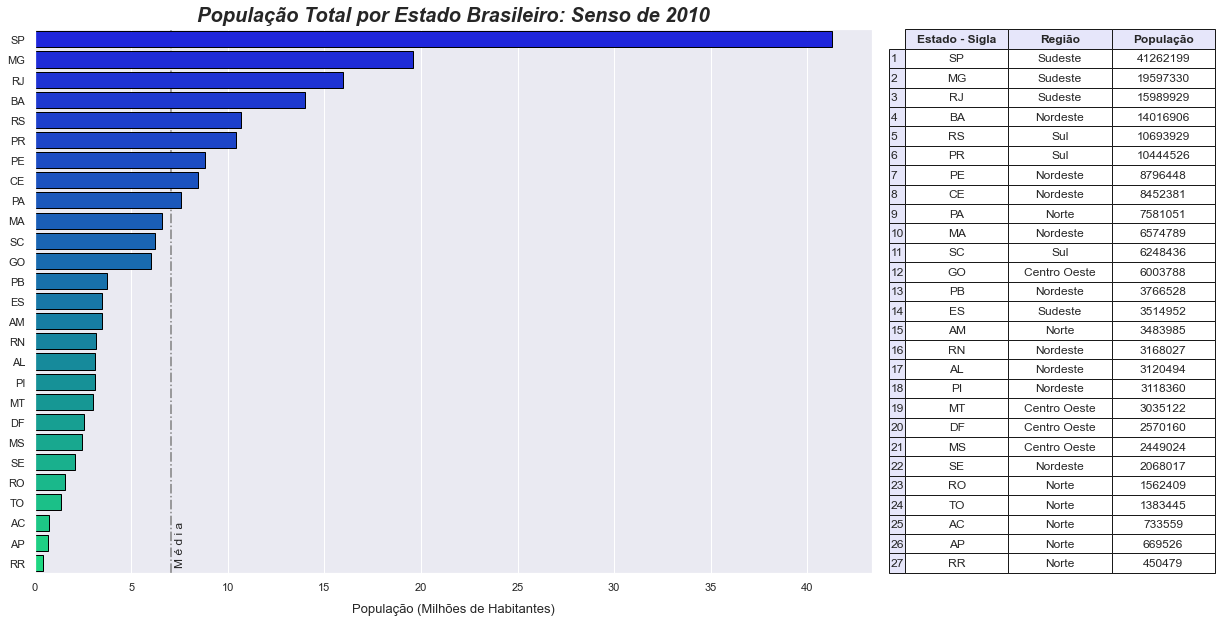

In [168]:
# Definindo parâmetros de tamanho:
f, ax = plt.subplots(figsize=(15, 10))

# Plotando um barplot utilizando Seaborn:
sns.barplot(data=population, x='População', y='Estado - Sigla',
            edgecolor='black', zorder=2, palette='winter')

# Definindo título e ajustando labels nos eixos X e Y:
plt.title(
    'População Total por Estado Brasileiro: Senso de 2010', 
    fontsize=20, fontweight='bold', fontstyle='italic', pad='8.0'
    )
ax.set_xticklabels(['0', '5', '10', '15', '20', '25', '30', '35', '40'])
plt.xlabel('População (Milhões de Habitantes)', fontsize=13, labelpad=10)
plt.ylabel('')

# Adicionando linha de média:
plt.axvline(
    x = 7065030, 
    ymin = 0, 
    ymax = 1,
    linewidth = 1.5, 
    linestyle ="dashdot",
    color ='gray', 
    zorder=1
    )
plt.annotate('M é d i a', fontsize=12, xy=(7267000, 26.1), rotation=90)

# Adicionando tabela com dados:
row_color = np.full(len(population.index), 'lavender')
col_color = np.full(len(population.columns), 'lavender')
row_index = np.arange(1, 28)

table = plt.table(
        cellText=population.values,
        cellLoc='center',
        rowLabels=row_index,
        colLabels=population.columns,
        bbox=[1.04, 0, 0.37, 1],
        rowColours=row_color,
        colColours=col_color,
        )
table.set_fontsize(12)

# Alterando propriedades dos headers das colunas:
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))       

plt.show()

Com a visualização podemos notar algumas informações relevantes:

- O estado de São Paulo possui um número de habitantes muito maior do que qualquer outro estado da nação, possuíndo mais que o dobro da população do segundo estado mais populado Minas Gerais;

- Justamente por causa de São Paulo, a linha média de número de habitantes fica por volta de 3 milhões de habitantes, o que seria um valor bem menor caso São Paulo não fosse um outlier tão expressivo quanto a seu número de habitantes;

- Como indicado pela tabela, podemos notar que a região Sudeste é a que possui os estados mais populosos, tendo 3 dos seus 4 estados nas primeiras posições (São Paulo, Minas Gerais e Rio de Janeiro). Apenas o estado de Espírito Santo aparece bem abaixo na posição 14;

- De contrapartida, a região Norte é a que possui os estados menos populosos porém com algumas exceções. Os estados de Rondônia, Tocantins, Acre, Amapá e Roraima se encontram todos no final da tabela. Como exceções, temos o estado do Amazonas na posição 15 e o estado do Pará na posição 9, bem acima dos outros estados da região Norte.

Essas informações serão comparadas a seguir com o rankeamento das cidades e, posteriormente, com o rankeamento dos estados por IDHM e seus índices.

#### **Rankeamento de cidades (número de população):**

Para o rankeamento das cidades mais populosas, iremos filtrar as cidades mais populosas de cada estado da união e compará-las entre si.

In [159]:
city = data_clean.groupby(['City', 'State'])[['Total_Pop']].sum()
city

,,Total_Pop
City,State,
Abadia De Goiás,GO,6876
Abadia Dos Dourados,MG,6704
Abadiânia,GO,15757
Abaetetuba,PA,141100
Abaeté,MG,22690
...,...,...
Áurea,RS,3665
Ângulo,PR,2859
Érico Cardoso,BA,10859


In [161]:
city.loc[city.groupby(level=[1])['Total_Pop'].idxmax()].head()

,,Total_Pop
City,State,
Rio Branco,AC,336038
Maceió,AL,932748
Manaus,AM,1802014
Macapá,AP,398204
Salvador,BA,2675656
